# **Auction Hunters**
## Exploratory Data Analysis Project
## Part 2: Exploratory Data Analysis
#### Joshua Higgins | October 2023 ~

## ❓ Did you see Part 1 - Data Pre-processing❓
* If you didn't see how I got here, check out the link below to the data collection, cleaning and verification (pre-processing) notebook.
   * You can find that here: [Part 1: Pre-processing!](https://github.com/Joshua-Higgins-jp/Auction_Hunters_EDA/blob/master/auction_hunters_preprocessing.ipynb)

## Objectives
* Import the cleaned data
* Perform a simple EDA on the data
   * Ask Questions and Answer them with data :)
* BONUS!? Rating prediction based on financial data?

## Questions

#### Financial Analysis
* 1.1. What is the best performing episode per season financially (Paid, Sold, Profit)?
* 1.2. What is the worst performing episode per season financially (Paid, Sold, Profit)?
* 1.3. What are the best 3 performing episodes over the entire series? (Paid, Sold, Profit)
* 1.4. What are the worst 3 performing episodes over the entire series? (Paid, Sold, Profit)
* 1.5. What is the profit margin per episode?
* 1.6. What is the return on investment per episode?
* 1.7. What is the relative Paid, Sold, Profit normalised for number of episodes per season?
* 1.8. What is the rank of best performing seasons using the relative scale?

#### Location Analysis
* 2.1. How many times did Allen and Ton visit each state per season?
* 2.2. How many times did Allen and Ton visit each state in the entire season?
* 2.3. Which state has the best profit margin?
* 2.4. Which state has the best return on investment?

#### Time Analysis
* 3.1. How has paid, sold and profit trended with time (season 1 to season 5)?
* 3.2. When were the peak profit and peak profit margin metrics attained?
* 3.3. How were paid, sold, profit, ROI and Profit Margins affected by year?
* 3.4. How were paid, sold, profit, ROI and Profit Margins affected by season?

#### Rating Analysis
* 4.1. What is the best episode per season?
* 4.2. What is the worst episode per season?
* 4.3. What are the top 5 episodes of the series?
* 4.4. What are the worst 5 episodes of the series?

#### Data Science
* 5.1. NLP: Is there a relationship between episode description sentiment and viewer rating?
* 5.2. NLP: Is there a relationship between episode description sentiment and financial metrics?
* 5.3. Is there a relationship between viewer rating and financial metrics?
   * Can you predict the viewer rating from the financial metrics, and/or vice versa?

# 1. Imports and Globals

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


In [2]:
DATA_DIR = "data"
MONETARY_COLS = ['paid_$', 'sold_$', 'profit_$']

## 1.1. Importing Cleaned Data

In [3]:
# Set Pandas display options so that we can see the entire dataframe.
pd.set_option('display.max_rows', None)     # Shows all rows
pd.set_option('display.max_columns', None)  # Shows all columns
pd.set_option('display.width', None)        # Adjusts the display width

In [4]:
prepared_pickle = f"{DATA_DIR}/final_dataset_auction_hunters.pkl"
with open(prepared_pickle, 'rb') as file:
    df = pickle.load(file)

In [5]:
df.head(3)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,description,paid_$,sold_$,profit_$,rating,votes,api_rating,api_votes,1,2,3,4,5,6,7,8,9,10
0,1,1,101,The Wild West,"San Bernardino, California",2010-11-09,Ton and Allen head to auctions in the desert t...,376,1190,814,7.8,34.0,7.56,55.0,1.0,0.0,0.0,1.0,1.0,10.0,14.0,13.0,6.0,9.0
1,1,2,102,The Big Score,"Downtown Los Angeles, California",2010-11-09,Ton and Allen bid on units in downtown LA and ...,2025,5850,3825,6.5,26.0,7.18,44.0,1.0,0.0,0.0,1.0,1.0,10.0,15.0,8.0,3.0,5.0
2,1,3,103,Ton's Got a Gun,"Mission Hills, California",2010-11-16,Allen encounters some old rivals in the Valley...,1900,9450,7550,6.8,20.0,7.69,39.0,0.0,0.0,0.0,0.0,1.0,6.0,13.0,10.0,2.0,7.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   season_num    107 non-null    int8          
 1   episode_num   107 non-null    int8          
 2   unique_ep_ID  107 non-null    int16         
 3   episode_name  107 non-null    object        
 4   location      107 non-null    object        
 5   air_date      107 non-null    datetime64[ns]
 6   description   107 non-null    object        
 7   paid_$        107 non-null    int32         
 8   sold_$        107 non-null    int32         
 9   profit_$      107 non-null    int32         
 10  rating        75 non-null     float64       
 11  votes         75 non-null     float64       
 12  api_rating    105 non-null    float64       
 13  api_votes     105 non-null    float64       
 14  1             105 non-null    float64       
 15  2             105 non-null    float64   

# 2. Data Playground

## 2.1. Financial Analysis

## Which Episodes Had the Min and Max Values for paid, sold and profit?

In [7]:
def min_or_max_feature_by_season(dataframe, min_or_max="min", feature_col='profit_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=False):
    """
    Pass in a dataframe, specify the most_feature column, prints text for the most_feature for each season.
    min_or_max is used to select which feature to select from each season.
    
    Dataframe contains columns: 
    ['season_num', 'episode_num', 'unique_ep_ID', 'episode_name', 'location', 
    'air_date', 'description', 'paid_$', 'sold_$', 'profit_$', 'rating',
    'votes', 'api_rating', 'api_votes', '1', '2', '3', '4', '5', '6', '7',
    '8', '9', '10']
    
    Unit is for monetary values $. If None, then no unit. Else, it will print the output sentence with your unit.
    
    Returns a dataframe of only the output values.
    """
    if min_or_max not in ["min", "max"]:
        raise ValueError("min_or_max argument must be 'min' or 'max'. Check input and try again.")
    
    feature_by_season_list_of_dicts = []
    
    df = dataframe
    season_num_list = df[season_col].unique()
    
    for season in season_num_list:
        season_df = df[df[season_col] == season]
        
        feature_id = season_df[feature_col].idxmax() if min_or_max == "max" else season_df[feature_col].idxmin()
        
        feature_ep_ID = season_df.loc[feature_id, 'unique_ep_ID']
        feature_episode_name = season_df.loc[feature_id, 'episode_name']
        feature_value = season_df.loc[feature_id, feature_col]
        #feature_location = season_df.loc[feature_id, 'location']
        
        ep_dict = {
            'season_num': season,
            'unique_ep_ID': feature_ep_ID,
            'episode_name': feature_episode_name,
            #'location': feature_location,
            feature_col: feature_value
        }
        
        if feature_col in monetary_cols:
            unit = '$'
        else:
            unit = None
        
        feature_by_season_list_of_dicts.append(ep_dict)
    
    result_df = pd.DataFrame.from_records(feature_by_season_list_of_dicts, index=['season_num'])
    
    if show_table is True:
        if min_or_max == "min": 
            print(f"\n💸 {min_or_max.capitalize()} {feature_col}:\n")
        if min_or_max == "max":
            print(f"\n🥇 {min_or_max.capitalize()} {feature_col}:\n")
        print(result_df)
        print("--------------------------------------------------------------")
        
    return result_df.reset_index() # this allows the season_num column to be accessed as a column later :)

In [31]:
max_profit_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="max", feature_col='profit_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=False)
min_profit_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="min", feature_col='profit_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=False)

max_sold_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="max", feature_col='sold_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=False)
min_sold_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="min", feature_col='sold_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=False)

max_paid_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="max", feature_col='paid_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=False)
min_paid_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="min", feature_col='paid_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=False)

## How about we visualise these results?

In [47]:
def plot_min_max_ep_by_season(min_df, max_df, category: str):
    """
    Choose a category such as paid, sold, profit. Then pass in your min and max dataframes from the selected category.
    """
    
    ax_font_size = 10
    title_font_size = 12
    annot_font_size = 8
    ax_ticks_font_size = 8
    
    if category not in ["paid", "sold", "profit"]:
        raise ValueError("min_or_max argument must be 'paid', 'sold' or 'profit'. Check input and try again.") 
        
    cat_to_col_dict = {"paid":"paid_$", 
                       "sold":"sold_$", 
                       "profit":"profit_$"}
    
    x_col = cat_to_col_dict[category]
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot minimum values on the left subplot
    ax1 = sns.barplot(x=x_col, 
                     y="season_num", 
                     data=min_df, 
                     hue="season_num", 
                     dodge=False, 
                     orient='h',
                     palette="Set2",
                     ax=axes[0])

    for index, row in min_df.iterrows():
        ax1.text(row[x_col], 
                 index, 
                 f"Ep# {row['unique_ep_ID']} (${row[x_col]})\n{row['episode_name']}", 
                 va='center').set_fontsize(annot_font_size)

    ax1.set_xlabel(f"{category.capitalize()} ($)", fontsize=ax_font_size, weight="bold")
    ax1.set_ylabel('Season #', fontsize=ax_font_size, weight="bold")
    ax1.set_title(f"Auction Hunters: Episodes of Min {category.capitalize()}", weight='bold', fontsize=title_font_size)
    # ax1.set_xlim(0, min_df[x_col].max() + 10000)
    ax1.tick_params(axis='both', which='both', labelsize=ax_ticks_font_size)

    if min_df[x_col].min() > 0:
        ax1.set_xlim(0.75*min_df[x_col].min(), 1.25*min_df[x_col].max())
    else:
        ax1.set_xlim(1.25*min_df[x_col].min(), 1.25*min_df[x_col].max())


    ax1.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

    # Plot maximum values on the right subplot
    ax2 = sns.barplot(x=x_col, 
                     y="season_num", 
                     data=max_df, 
                     hue="season_num", 
                     dodge=False, 
                     orient='h',
                     palette="Set2",
                     ax=axes[1])

    for index, row in max_df.iterrows():
        ax2.text(row[x_col], 
                 index, 
                 f"Ep# {row['unique_ep_ID']} (${row[x_col]})\n{row['episode_name']}", 
                 va='center').set_fontsize(annot_font_size)

    ax2.set_xlabel(f"{category.capitalize()} ($)", fontsize=ax_font_size, weight="bold")
    ax2.set_ylabel('Season #', fontsize=ax_font_size, weight="bold")
    ax2.set_title(f"Auction Hunters: Episodes of Max {category.capitalize()}", weight='bold', fontsize=title_font_size)
    ax2.set_xlim(0, max_df[x_col].max() + 10000)
    ax2.tick_params(axis='both', which='both', labelsize=ax_ticks_font_size)

    ax2.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    
    plt.tight_layout()
    plt.show()

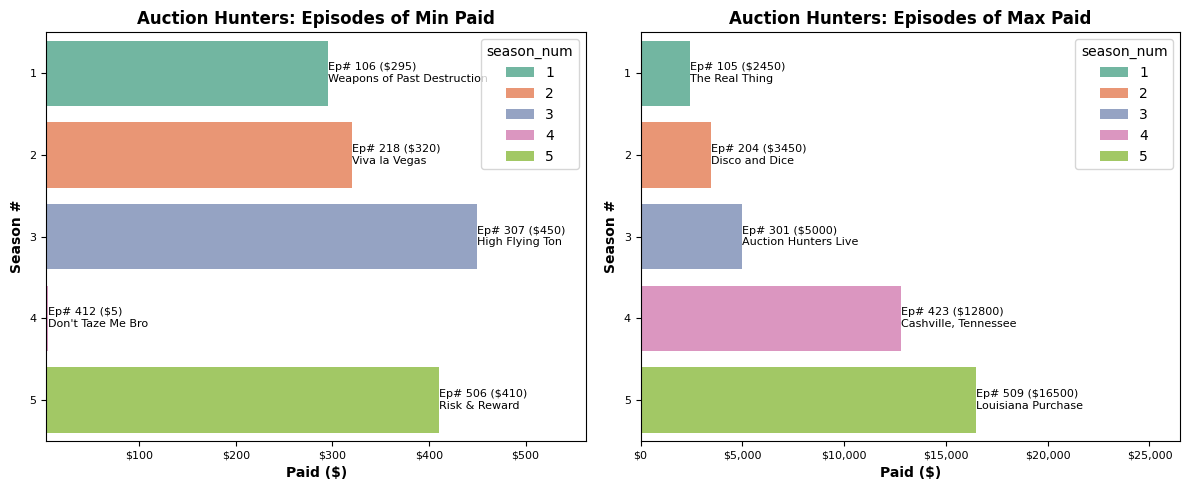

In [48]:
plot_min_max_ep_by_season(min_df=min_paid_ep_by_season_df,
                          max_df=max_paid_ep_by_season_df,
                          category="paid")

## Notes

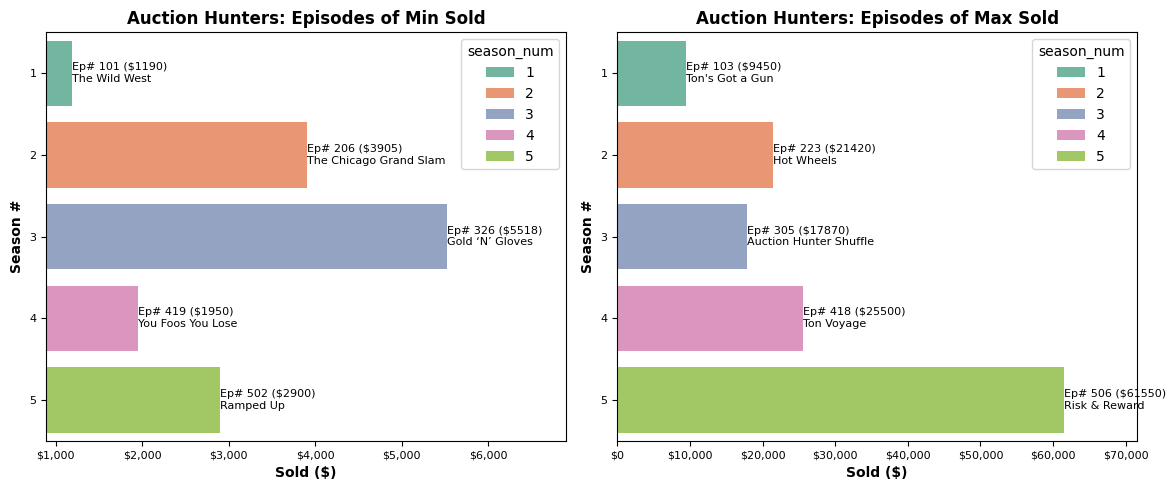

In [49]:
plot_min_max_ep_by_season(min_df=min_sold_ep_by_season_df,
                          max_df=max_sold_ep_by_season_df,
                          category="sold")

## Notes

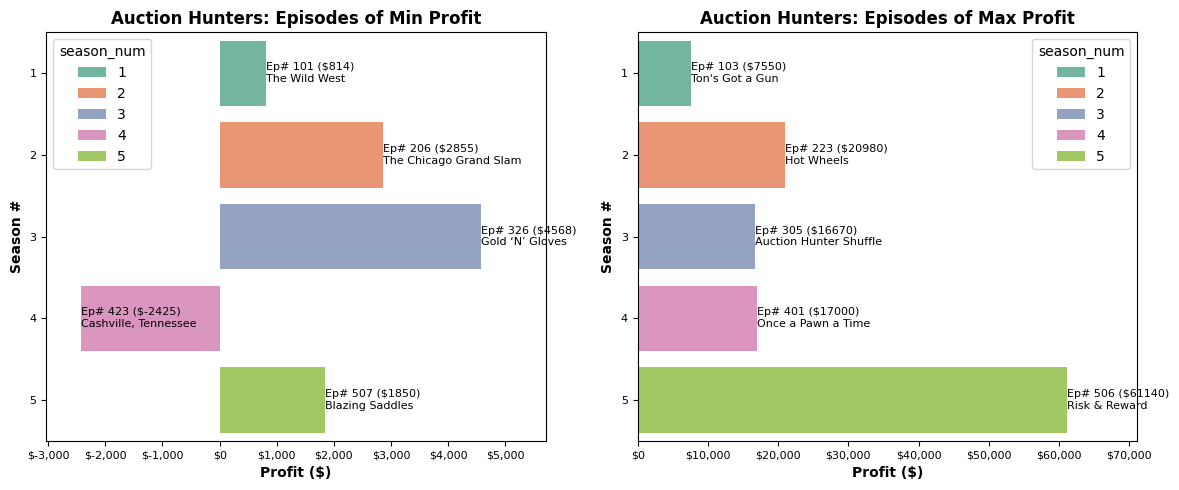

In [50]:
plot_min_max_ep_by_season(min_df=min_profit_ep_by_season_df,
                          max_df=max_profit_ep_by_season_df,
                          category="profit")

## Notes

## 2.2. Plots for paid, sold and profit

In [13]:
def show_basic_feature_plot(dataframe, feature_col, unit):
    """
    Takes a dataframe with 'season_num', 'unique_ep_ID' and other monetary values and plots them, index vs. feature_col.
    """
    
    if unit not in ["$", "%"]:
        raise ValueError("Unit must be '$' or '%'. Check input and try again.") 
        
    df = dataframe

    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=df, x=df.index, y=feature_col, hue='season_num', palette='Set1')

    # Initialize a counter to keep track of the episode index across seasons
    episode_counter = 0

    # Annotate the line with unique_ep_ID
    for line in ax.lines:
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        for x, y in zip(x_data, y_data):
            unique_ep_ID = df.loc[episode_counter, 'unique_ep_ID']
            ax.annotate(f'{unique_ep_ID}', (x, y), textcoords='offset points', xytext=(0, 10), ha='center', fontsize=6)
            episode_counter += 1  # Increment the episode counter

    plt.xlabel('Episode Index (Number)', weight='bold')
    plt.ylabel(f"{feature_col}", weight='bold')
    plt.title(f"{feature_col} vs. Episode Index with Unique Episode ID Annotations", weight='bold', fontsize=16)
    plt.legend(title='Season')

    # Add more gridlines
    ax.set_xticks(range(0, len(df), 10))

    # Format y-axis labels with comma separator
    if unit == "$":
        ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    if unit == "%":
        ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}%'))

    plt.grid(True)  # Add grid lines to both x and y axes
    plt.tight_layout()
    plt.show()

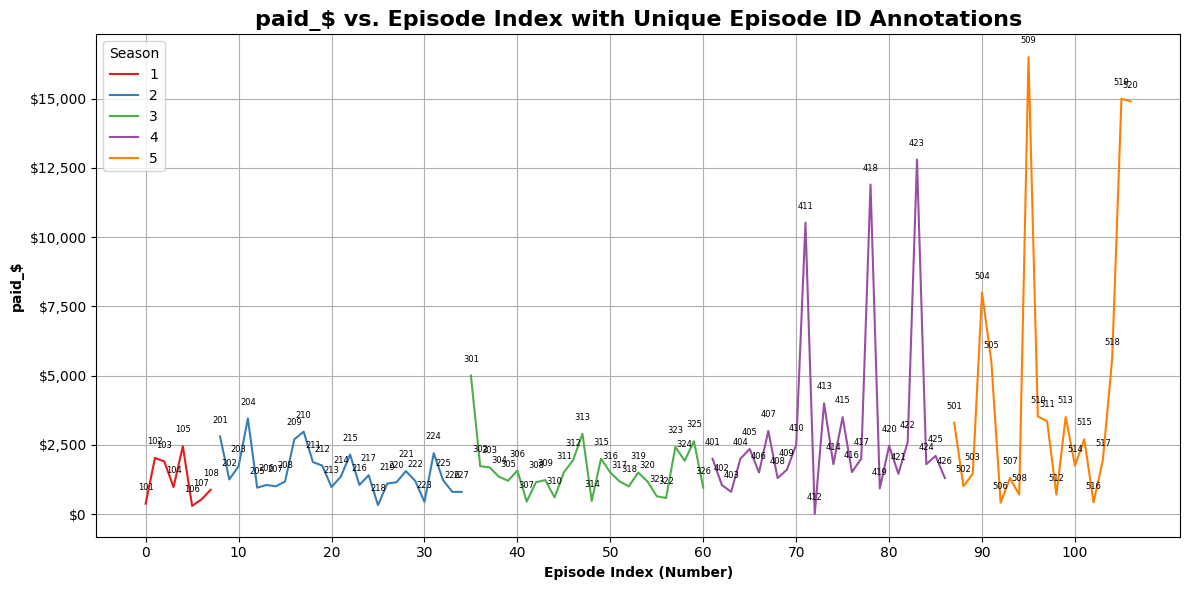

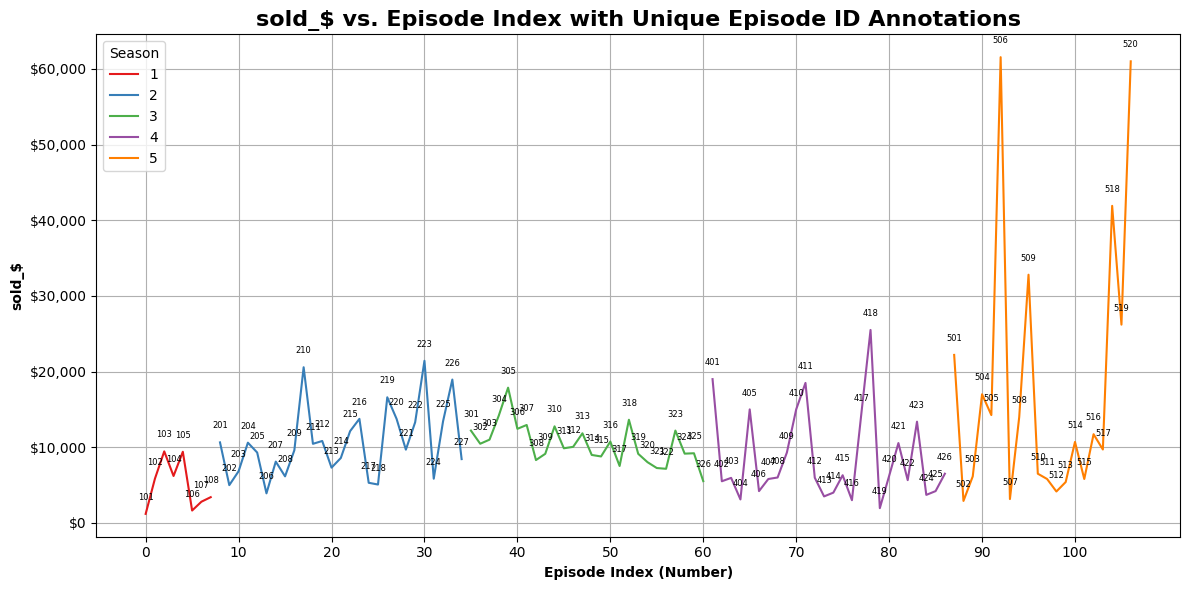

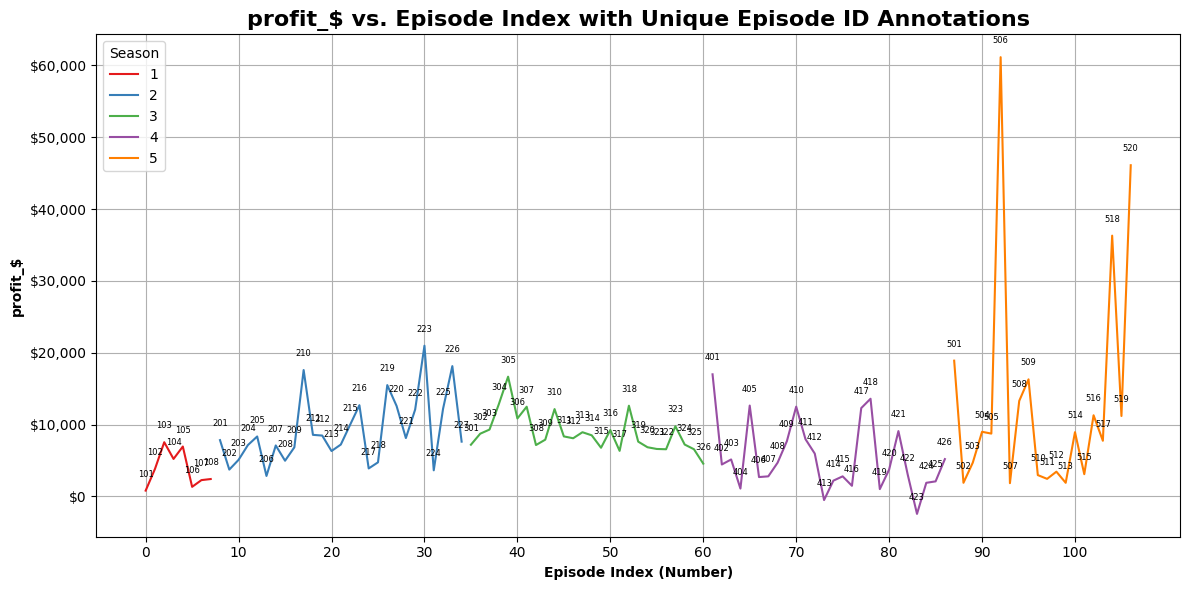

In [14]:
list_of_features_to_plot = ['paid_$', 'sold_$', 'profit_$']
for feature in list_of_features_to_plot:
    show_basic_feature_plot(df, feature, "$")

## Profit Margin and Return on Investment

In [15]:
simple_cols = ['season_num', 'episode_num', 'unique_ep_ID', 'episode_name', 'location',
       'air_date', 'description', 'paid_$', 'sold_$', 'profit_$']

In [16]:
df_finance = df.loc[:, simple_cols]
df_finance.head(3)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,description,paid_$,sold_$,profit_$
0,1,1,101,The Wild West,"San Bernardino, California",2010-11-09,Ton and Allen head to auctions in the desert t...,376,1190,814
1,1,2,102,The Big Score,"Downtown Los Angeles, California",2010-11-09,Ton and Allen bid on units in downtown LA and ...,2025,5850,3825
2,1,3,103,Ton's Got a Gun,"Mission Hills, California",2010-11-16,Allen encounters some old rivals in the Valley...,1900,9450,7550


In [17]:
# Calculate profit margin and add it to the DataFrame
df_finance['profit_margin_%'] = (df['profit_$'] / df['sold_$']) * 100

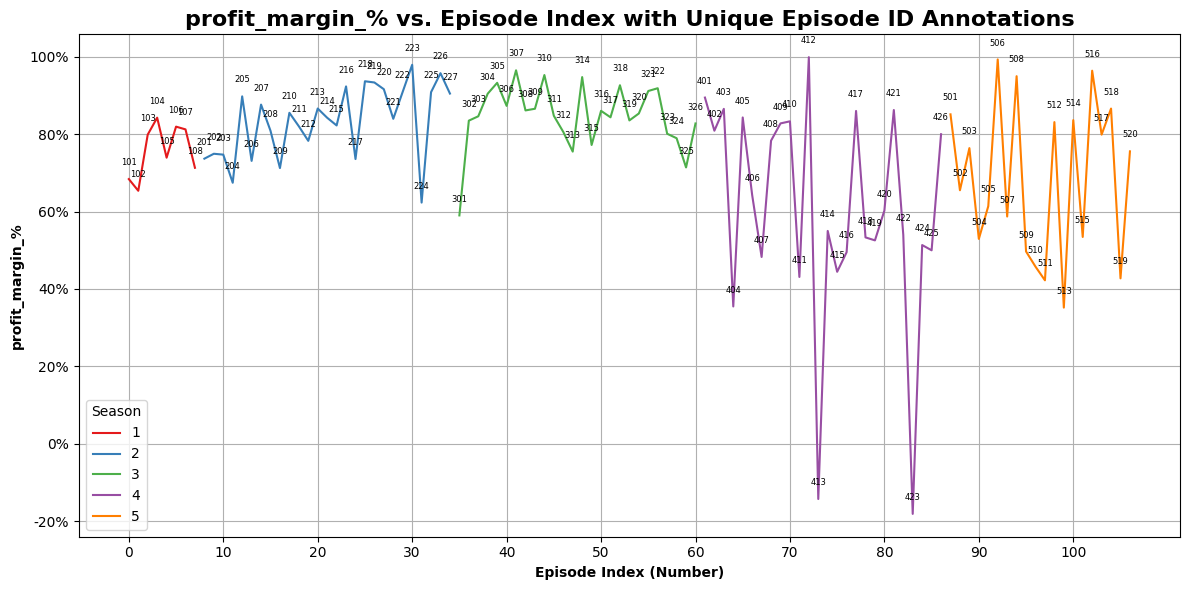

In [18]:
show_basic_feature_plot(dataframe=df_finance, feature_col='profit_margin_%', unit="%")

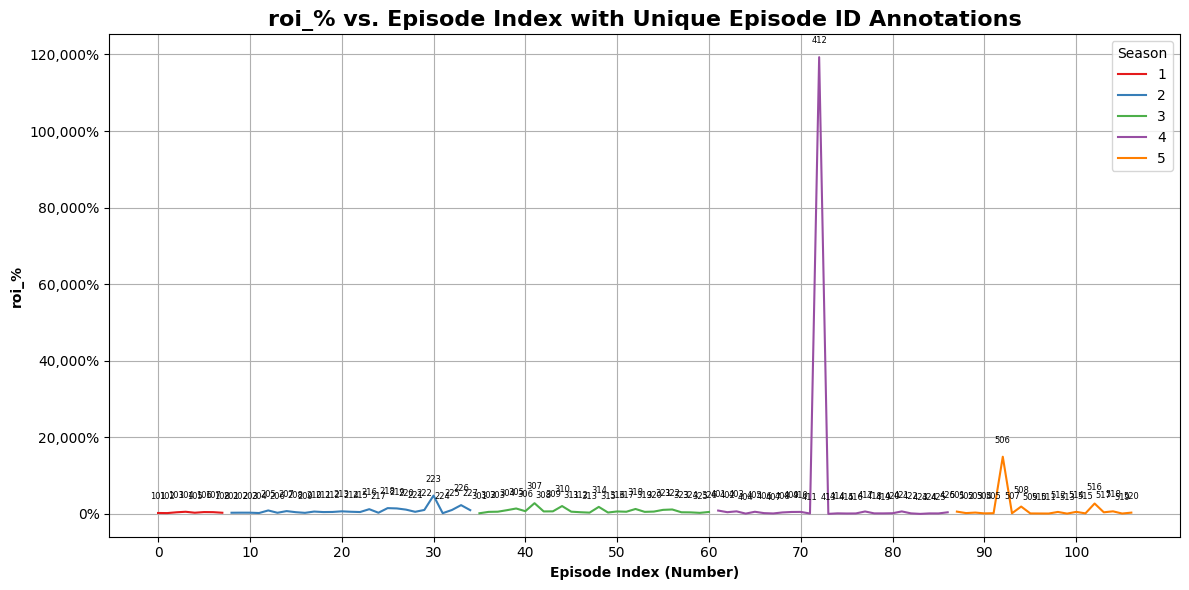

In [25]:
# Calculate ROI and add it to the DataFrame
df_finance['roi_%'] = (df['profit_$'] / df['paid_$']) * 100
show_basic_feature_plot(dataframe=df_finance, feature_col='roi_%', unit="%")

In [29]:
# Show ROI values only under 2000%
df_ROI_low = df_finance[df_finance['roi_%'] <= 2000].reset_index()

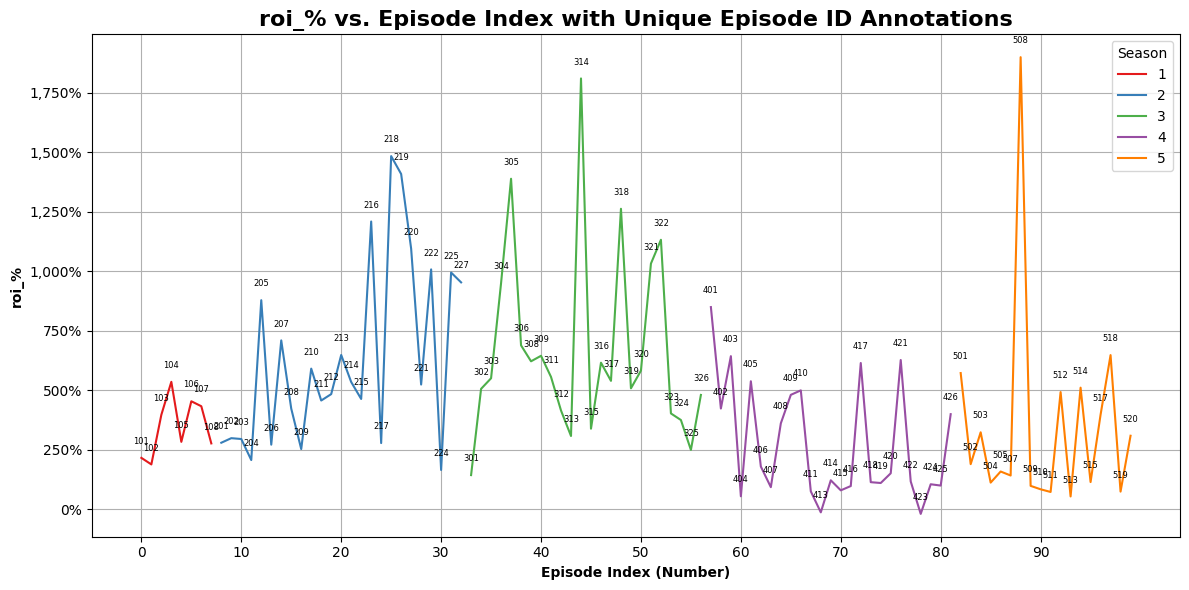

In [30]:
show_basic_feature_plot(dataframe=df_ROI_low, feature_col='roi_%', unit="%")

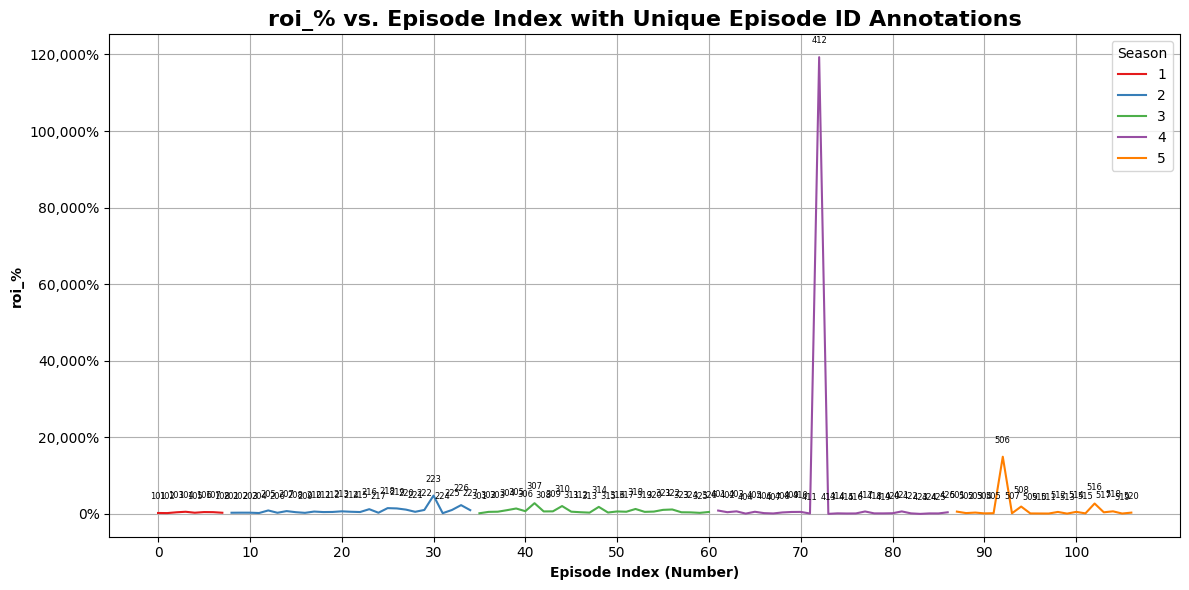

In [20]:
show_basic_feature_plot(dataframe=df_finance, feature_col='roi_%', unit="%")

## Total Expenditure, Gross Revenue and Net Profit

In [21]:
total_expenditure_by_season = df_finance.groupby('season_num')['paid_$'].sum().reset_index()
total_expenditure_by_season.rename(columns={'paid_$': 'total_expenditure_$'}, inplace=True)

gross_revenue_by_season = df_finance.groupby('season_num')['sold_$'].sum().reset_index()
gross_revenue_by_season.rename(columns={'sold_$': 'gross_revenue_$'}, inplace=True)

net_profit_by_season = df_finance.groupby('season_num')['profit_$'].sum().reset_index()
net_profit_by_season.rename(columns={'profit_$': 'net_profit_$'}, inplace=True)

In [22]:
temp_merge1 = total_expenditure_by_season.merge(gross_revenue_by_season, on='season_num', how='left')
df_erp = temp_merge1.merge(net_profit_by_season, on='season_num', how='left')

In [23]:
print(df_erp)

   season_num  total_expenditure_$  gross_revenue_$  net_profit_$
0           1                 9421            39925         30404
1           2                40410           285450        244380
2           3                40287           270309        230022
3           4                78783           222045        140262
4           5                91556           362870        271314


## Cumulative Metrics

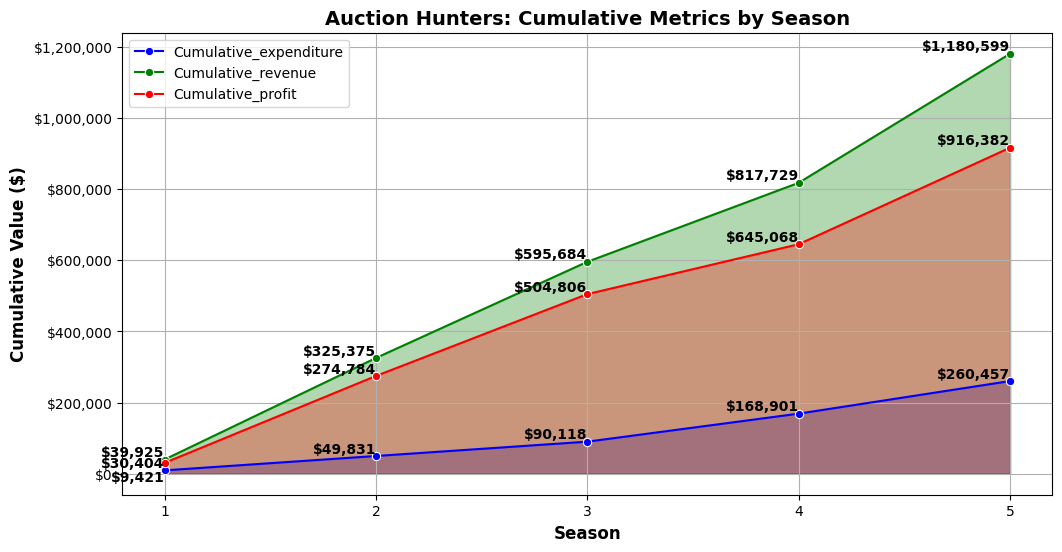

In [24]:
def plot_cumulative_metrics(df):
    # Create a figure
    plt.figure(figsize=(12, 6))
    
    list_of_metrics = ['cumulative_expenditure', 'cumulative_revenue', 'cumulative_profit']

    # Calculate cumulative metrics
    df['cumulative_expenditure'] = df['total_expenditure_$'].cumsum()
    df['cumulative_revenue'] = df['gross_revenue_$'].cumsum()
    df['cumulative_profit'] = df['net_profit_$'].cumsum()

    # Plot cumulative paid
    ax = sns.lineplot(data=df, x='season_num', y='cumulative_expenditure', color='b', label=list_of_metrics[0].capitalize(), marker="o") # b
    ax.fill_between(df['season_num'], 0, df['cumulative_expenditure'], alpha=0.3, color='b')

    # Plot cumulative sold
    ax = sns.lineplot(data=df, x='season_num', y='cumulative_revenue', color='g', label=list_of_metrics[1].capitalize(), marker="o") # g
    ax.fill_between(df['season_num'], 0, df['cumulative_revenue'], alpha=0.3, color='g')

    # Plot cumulative profit
    ax = sns.lineplot(data=df, x='season_num', y='cumulative_profit', color='r', label=list_of_metrics[2].capitalize(), marker="o") # r
    ax.fill_between(df['season_num'], 0, df['cumulative_profit'], alpha=0.3, color='r')

    # Annotate cumsum() values at each season with $
    for metric in list_of_metrics:
        for i, value in enumerate(df[metric]):
            if i == 0:  # Check if it's season 1
                if metric == 'cumulative_expenditure':
                    plt.text(df['season_num'][i], value, f'${int(value):,}', ha='right', va='top', fontsize=10, weight="bold")
                elif metric == 'cumulative_revenue':
                    plt.text(df['season_num'][i], value, f'${int(value):,}', ha='right', va='bottom', fontsize=10, weight="bold")
                else:  # cumulative_profit
                    plt.text(df['season_num'][i], value, f'${int(value):,}', ha='right', va='center', fontsize=10, weight="bold")
            else:  # For other seasons, keep the default alignment
                plt.text(df['season_num'][i], value, f'${int(value):,}', ha='right', va='bottom', fontsize=10, weight="bold")

    plt.title('Auction Hunters: Cumulative Metrics by Season', weight="bold", fontsize=14)
    plt.xlabel('Season', fontsize=12, weight="bold")
    plt.ylabel('Cumulative Value ($)', fontsize=12, weight="bold")
    plt.xticks(range(1, 6), fontsize=10)
    plt.grid(True)  # Add grid lines
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    plt.yticks(fontsize=10)
    plt.legend()
    plt.show()

# Call the function with your DataFrame
plot_cumulative_metrics(df_erp)

... to be continued